# Dots on a line agent-based-modelling experiment


This file contains two classes: a creature class Dot and an environment class Line. Objects from the Dot class (will call them dots from now on) live in an environment (so far only lines, but can be expaned). dots can only sense one dot above and one fot below them. The agent behaviour is that dots are afraid of one another, so every time they sense other dots, they act and position themselves in the middle between their neighbouring dots. When a dot acts, it sometimes takes a random step.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [ ]:
class ExampleClass(object):
    """The summary line for a class docstring should fit on one line.

    If the class has public attributes, they may be documented here
    in an ``Attributes`` section and follow the same formatting as a
    function's ``Args`` section. Alternatively, attributes may be documented
    inline with the attribute's declaration (see __init__ method below).

    Properties created with the ``@property`` decorator should be documented
    in the property's getter method.

    Attributes
    ----------
    attr1 : str
        Description of `attr1`.
    attr2 : :obj:`int`, optional
        Description of `attr2`.

    """

In [13]:
class Dot:
    """Generates creature of type dot.
    
    A dot lives in an environment. It can sense, act or stay.
    
    Attributes
    ----------
    envrmt: environment class object
        Environment the dot lives in
    
    """
    
    def __init__(self, init_pos=None, visib=True, max_step=10):
        """Initialize dot object.
        
        Parameters
        ----------
        init_pos: float, optional
            Initial position of dot.
            If not supplied, random number is taken.
        
        visib: bool, optional
            If creature is visible to other creatures.
            If not passed, initiated as True.
        max_step: float, optional
            Maximimum step size.
            If not passed, initiated as 10.
        """
        if init_pos is None:
            init_pos = np.random.randint(1, 100)
        self.hist = [init_pos]
        self.envrmt = None
        self.max_step = max_step
        self.visib = visib
        
    def sense(self):
        """Sense position of neighbour objects."""
        cl_l, cl_r = self.envrmt.nearest(self)
        self.act(np.array([cl_l, cl_r]))
        
    def act(self, others):
        """Take step size according to sense."""
        randnum = np.random.randint(-100, 100)
        if abs(randnum) < 5:
            # small probability of random step
            self.hist.append(self.hist[-1] + randnum)
        else:
            # Step taken is the minimum of the average between neighbours and max step size
            self.hist.append(self.hist[-1] + min(np.average(others), self.max_step))
            
    def stay(self):
        """Stay at current position."""
        self.hist.append(self.hist[-1])
    
class Line:
    """To be added"""
    def __init__(self, creat_ls=[]):
        self.creat_ls = []
        for creat in creat_ls:
            self.add_creat(creat)
    
    def nearest(self, obj):
        """To be added"""
        min_l = -1e3
        min_r = 1e3
        other_obj = self.creat_ls.copy()
        other_obj.remove(obj)
        for creat in other_obj:
            if abs(len(obj.hist) - len(creat.hist)) > 1:
                raise ValueError ('Maximum timestep difference > 1.')
            # Using loc, locations of creatures are compared at equal times
            loc = len(obj.hist) - 1
            dist = creat.hist[loc] - obj.hist[loc]
            if dist < 0 and abs(dist) < abs(min_l) and creat.visib == True:
                min_l = dist
            elif dist > 0 and dist < min_r and creat.visib == True:
                min_r = dist
        return min_l, min_r
        
    def add_creat(self, new_cr):
        """To be added"""
        self.creat_ls.append(new_cr)
        new_cr.envrmt = self
        
    def plot(self):
        """To be added"""
        fig = plt.figure()
        ax = plt.axes()
        markers = ['*', 'o', 'D', '<', '+', '>', 'v', '^', '1', '2', '3', '4', '8']
        for n, creat in enumerate(self.creat_ls):
            ax.plot(range(len(creat.hist)), creat.hist)#, marker=markers[n])
        plt.ylim(-5, 105)
        plt.plot()
        

In [14]:
# Initiate all the dots
# Two dots are placed on the boundary of the domain, now position 1 and 100
d_1 = Dot(init_pos=1)
d_2 = Dot()
d_3 = Dot()
d_4 = Dot()
d_5 = Dot()
d_6 = Dot()
d_7 = Dot()
d_8 = Dot()
d_9 = Dot()
d_10 = Dot()
d_11 = Dot()
d_12 = Dot(init_pos=100)

In [15]:
# Generate an environment name and add the dots
line_1 = Line(creat_ls=[d_1, d_2, d_3, d_4, d_5, d_6, d_7, d_8, d_9, d_10, d_11, d_12])

In [17]:
# Calling 150 timesteps
for n in range(150):
    d_1.stay()
    d_2.sense()
    d_3.sense()
    d_4.sense()
    d_5.sense()
    d_6.sense()
    d_7.sense()
    d_8.sense()
    d_9.sense()
    d_10.sense()
    d_11.sense()
    d_12.stay()

<IPython.core.display.Javascript object>


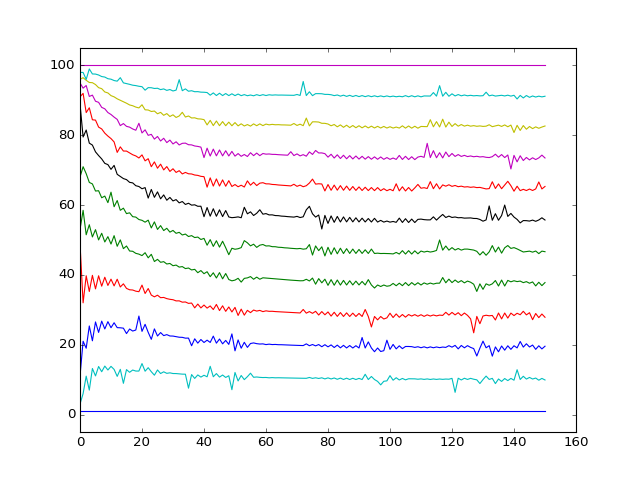

In [18]:
# Plotting all the movement of the dots
line_1.plot()